## make_regression 

The `make_regression` function is a utility in the `sklearn.datasets` module that generates a synthetic dataset for regression tasks. It is commonly used for testing and benchmarking regression algorithms.

### Syntax

```python
sklearn.datasets.make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
```

### Parameters
- `n_samples`: int, optional (default=100)
  - The number of samples to generate.
- `n_features`: int, optional (default=100)
  - The total number of features.
- `n_informative`: int, optional (default=10)
  - The number of informative features , meaning the number of features used to build the linear model.
  - example: If `n_informative` is set to 10, only 10 features will be used to generate the target variable, while the remaining features will be random noise.
- `n_targets`: int, optional (default=1)
    - The number of regression targets, i.e., the number of output variables.
    - If `n_targets` is greater than 1, the function generates a multi-output regression problem.
- `bias`: float, optional (default=0.0)
    - The bias term in the underlying linear model , i.e., the intercept.
- `tail_strength`: float, optional (default=0.5)
    - The relative importance of the fat noisy tail of the singular values profile.
- `noise`: float, optional (default=0.0)
    - The standard deviation of the Gaussian noise applied to the output.
- `shuffle`: bool, optional (default=True)
    - Whether to shuffle the samples and features.
    - example: If `shuffle` is set to True, the order of the samples and features in the generated dataset will be randomized.
- `coef`: bool, optional (default=False)
    - If True, the function also returns the coefficients of the underlying linear model.
- `random_state`: int, RandomState instance or None, optional (default=None)
    - Controls the randomness of the dataset generation.
- `effective_rank`: int or None, optional (default=None)
    - If not None, the approximate number of singular vectors required to explain most of the input data by linear combinations.


In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [29]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

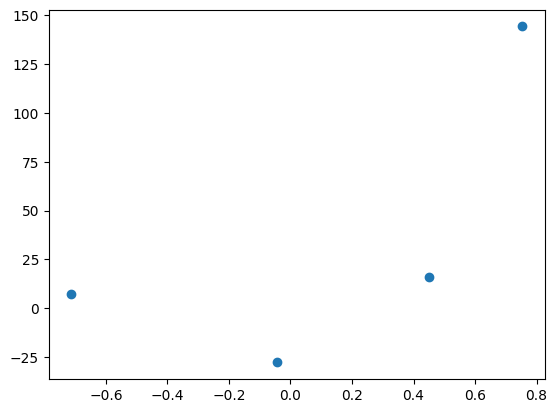

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [31]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
reg.coef_

array([78.35063668])

In [34]:
reg.intercept_

np.float64(26.15963284313262)

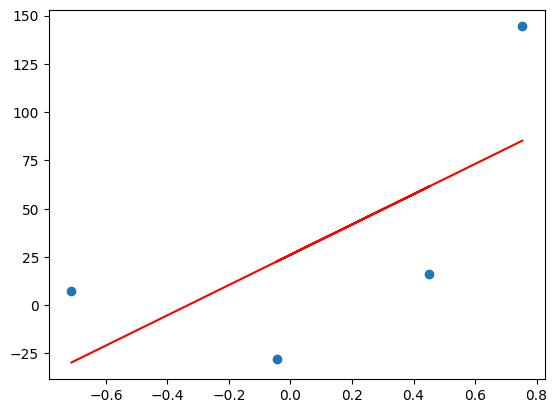

In [35]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [36]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(4)

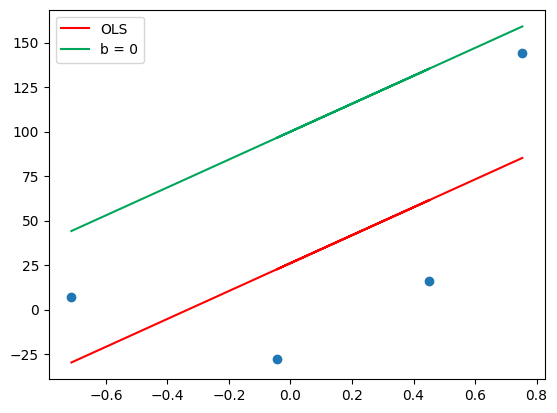

In [37]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [38]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(590.7223659179078)

In [49]:
# Lets take learning rate = 0.1
lr = 0.01

step_size = loss_slope*lr
step_size

np.float64(5.434645766444752)

In [50]:
# Calculating the new intercept
b = b - step_size
b

np.float64(83.22348480793143)

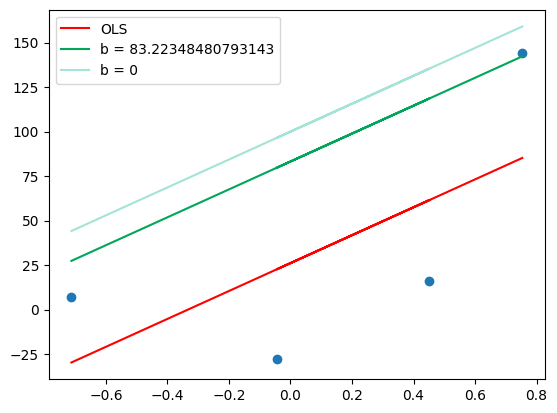

In [51]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [52]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(456.51024438135926)

In [53]:
step_size = loss_slope*lr
step_size

np.float64(4.5651024438135925)

In [54]:
b = b - step_size
b

np.float64(78.65838236411784)

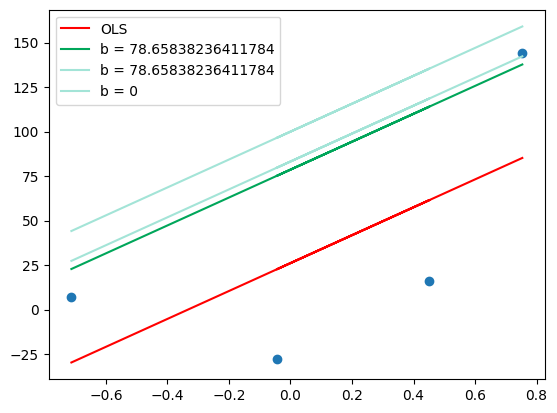

In [55]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [56]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(419.98942483085057)

In [57]:
step_size = loss_slope*lr
step_size

np.float64(4.199894248308506)

In [58]:
b = b - step_size
b

np.float64(74.45848811580933)

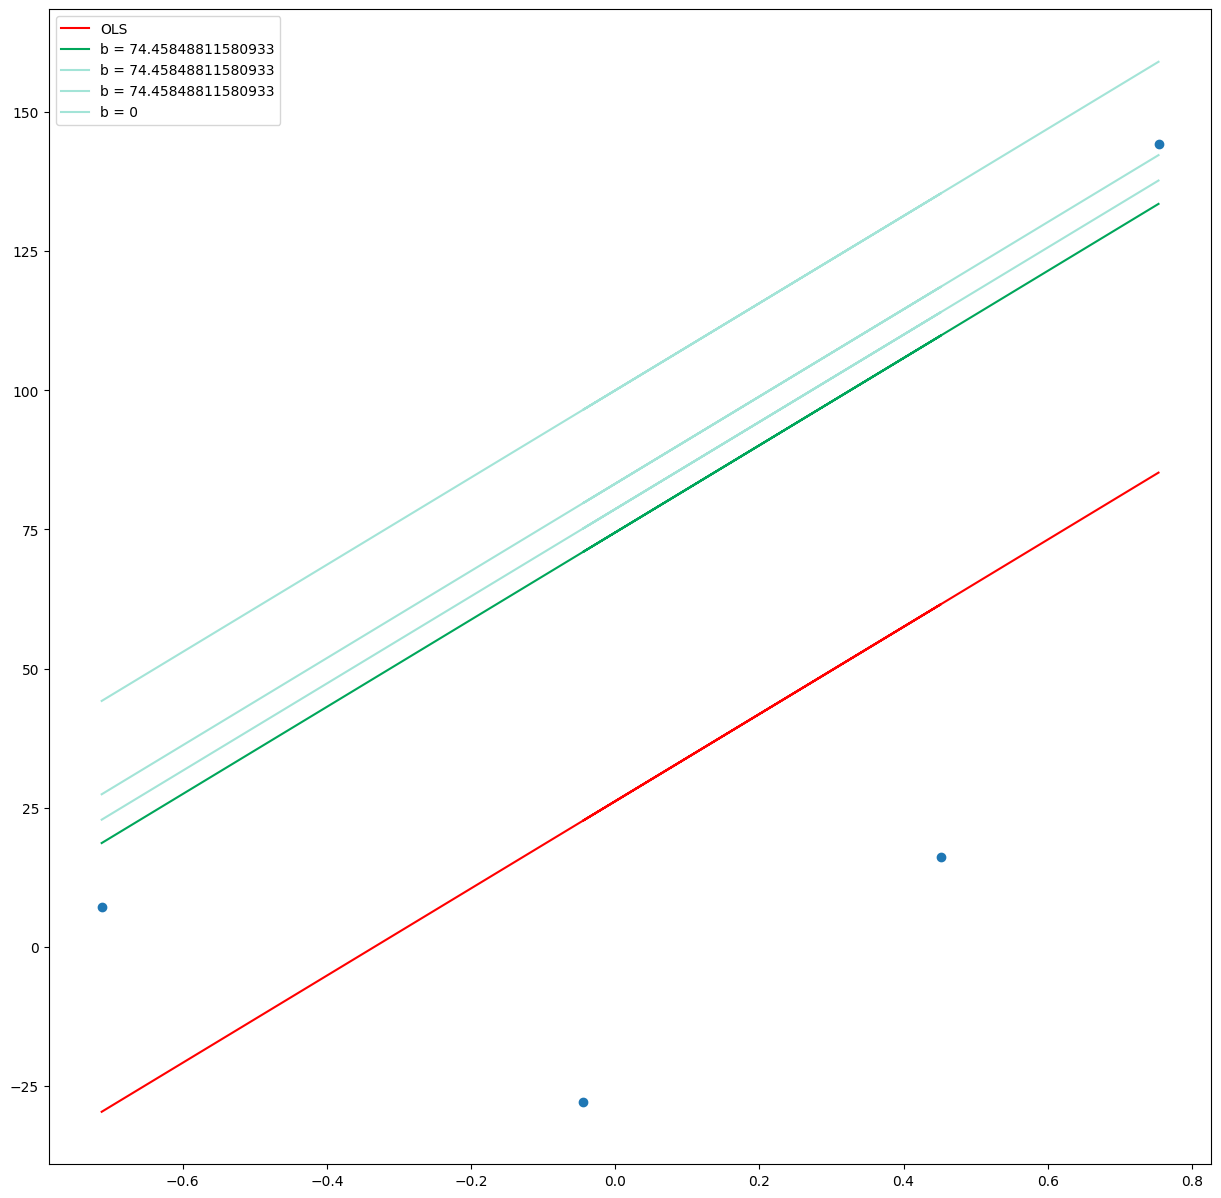

In [59]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

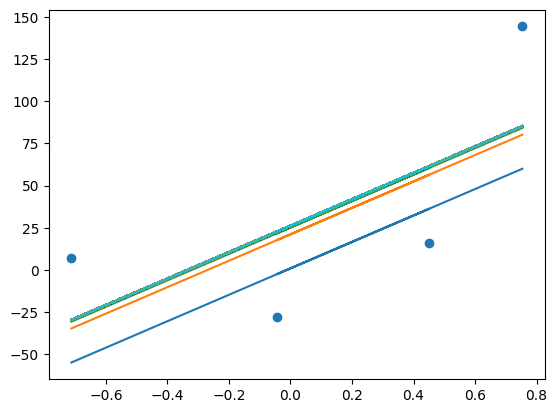

In [64]:
b = -100
m = 78.35
lr = 0.1

epochs = 200

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)